# Customer Churn Forecasting

In [1]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [125]:
from pyspark.sql.types import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = spark.read.csv('/CA1_customer_churn/customer_churn.csv', header=True)

In [4]:
data.show(5)

+-------------+---------+--------------------+--------------+--------------+----------------+----------------+-----------------------+---------+-----------+------+---+--------------+-----+
|Call  Failure|Complains|Subscription  Length|Charge  Amount|Seconds of Use|Frequency of use|Frequency of SMS|Distinct Called Numbers|Age Group|Tariff Plan|Status|Age|Customer Value|Churn|
+-------------+---------+--------------------+--------------+--------------+----------------+----------------+-----------------------+---------+-----------+------+---+--------------+-----+
|            8|        0|                  38|             0|          4370|              71|               5|                     17|        3|          1|     1| 30|        197.64|    0|
|            0|        0|                  39|             0|           318|               5|               7|                      4|        2|          1|     2| 25|        46.035|    0|
|           10|        0|                  37|         

In [5]:
data.limit(10).toPandas()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.28,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.96,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.44,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.68,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.92,0


ANN vs RNN (Recurrent neural networks)

## EDA

In [6]:
data.columns

['Call  Failure',
 'Complains',
 'Subscription  Length',
 'Charge  Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

In [7]:
data.count()

3150

In [8]:
data.describe().show()

+-------+-----------------+-------------------+--------------------+------------------+------------------+------------------+------------------+-----------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+
|summary|    Call  Failure|          Complains|Subscription  Length|    Charge  Amount|    Seconds of Use|  Frequency of use|  Frequency of SMS|Distinct Called Numbers|         Age Group|        Tariff Plan|             Status|               Age|    Customer Value|              Churn|
+-------+-----------------+-------------------+--------------------+------------------+------------------+------------------+------------------+-----------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+
|  count|             3150|               3150|                3150|              3150|              3150|              3150|              315

## Exploratory Data Analysis

In [9]:
data = data.toPandas()
df = pd.DataFrame(data)

df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.64,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.52,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.02,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Call  Failure            3150 non-null   object
 1   Complains                3150 non-null   object
 2   Subscription  Length     3150 non-null   object
 3   Charge  Amount           3150 non-null   object
 4   Seconds of Use           3150 non-null   object
 5   Frequency of use         3150 non-null   object
 6   Frequency of SMS         3150 non-null   object
 7   Distinct Called Numbers  3150 non-null   object
 8   Age Group                3150 non-null   object
 9   Tariff Plan              3150 non-null   object
 10  Status                   3150 non-null   object
 11  Age                      3150 non-null   object
 12  Customer Value           3150 non-null   object
 13  Churn                    3150 non-null   object
dtypes: object(14)
memory usage: 344.7+ KB


In [11]:
# Convert from string object to float
df[df.columns.tolist()] = df[df.columns.tolist()].astype(float)

In [12]:
import numpy as np
df.describe(include = 'all')

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [13]:
df.isnull().sum(axis = 0)

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

0.0    2655
1.0     495
Name: Churn, dtype: int64

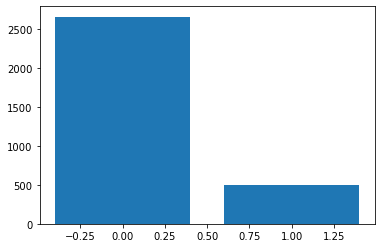

In [14]:
plt.bar(df['Churn'].unique(), df['Churn'].value_counts())
df.Churn.value_counts()

## Correlation Matrix

In [15]:
corr = df.corr() 
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm , axis=None).set_precision(2)

# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null('#f1f1f1')  # Color NaNs grey
 .format(precision=2))

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Complains,0.15,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Subscription Length,0.17,-0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Charge Amount,0.59,-0.03,0.08,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Seconds of Use,0.50,-0.10,0.12,0.45,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Frequency of use,0.57,-0.09,0.11,0.38,0.95,nan,nan,nan,nan,nan,nan,nan,nan,nan
Frequency of SMS,-0.02,-0.11,0.08,0.09,0.10,0.10,nan,nan,nan,nan,nan,nan,nan,nan
Distinct Called Numbers,0.50,-0.06,0.09,0.42,0.68,0.74,0.08,nan,nan,nan,nan,nan,nan,nan
Age Group,0.05,0.02,0.02,0.28,0.02,-0.03,-0.05,0.02,nan,nan,nan,nan,nan,nan
Tariff Plan,0.19,0.00,-0.16,0.32,0.13,0.21,0.20,0.17,-0.15,nan,nan,nan,nan,nan


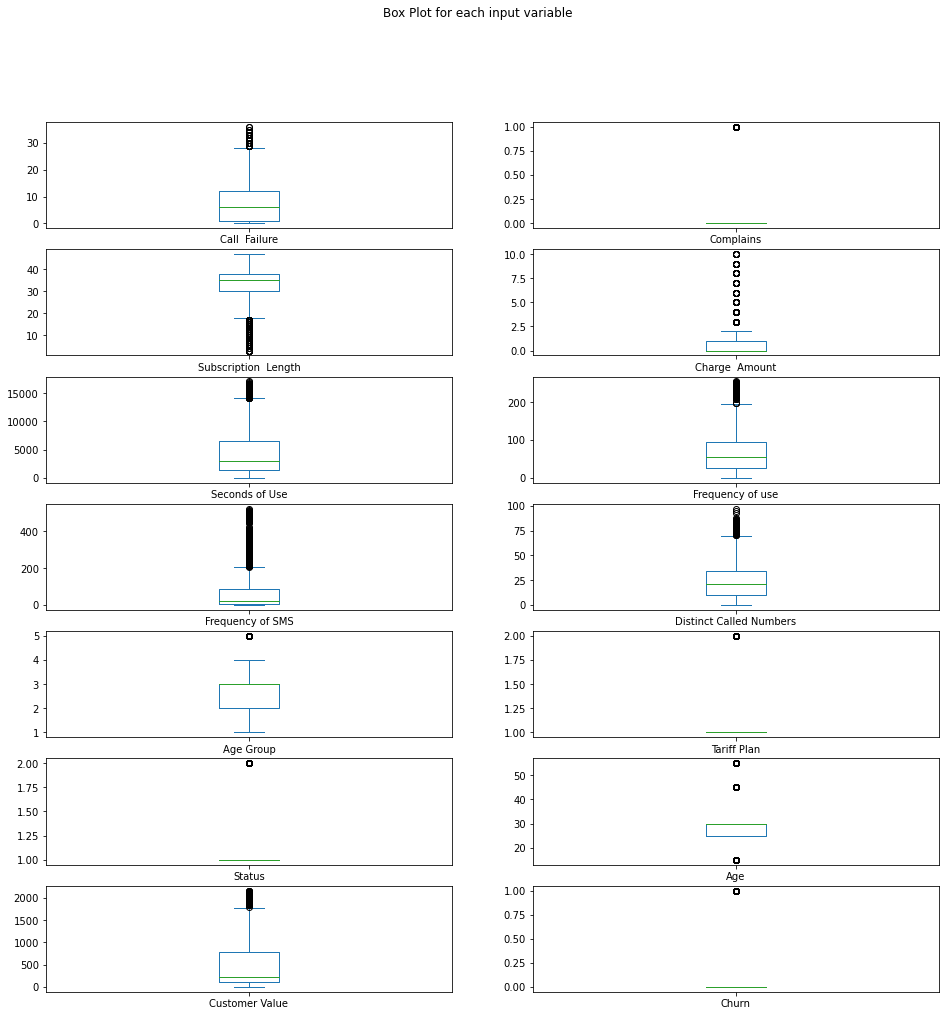

In [16]:
df.plot(kind='box', subplots=True, layout= (7,2), sharex=False, sharey=False, figsize=(16,16), title='Box Plot for each input variable')
plt.show()

<AxesSubplot:xlabel='Subscription  Length', ylabel='Density'>

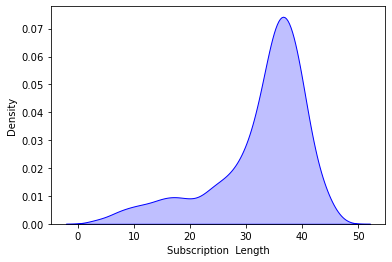

In [17]:
sns.kdeplot(data=df, x='Subscription  Length', color='b', shade=True)

<AxesSubplot:xlabel='Charge  Amount', ylabel='Density'>

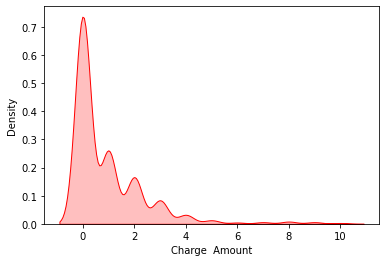

In [18]:
sns.kdeplot(data=df, x='Charge  Amount', color='r', shade=True)

<AxesSubplot:xlabel='Customer Value', ylabel='Density'>

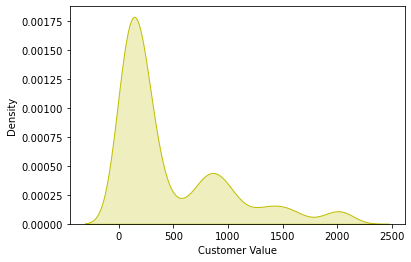

In [19]:
sns.kdeplot(data=df, x='Customer Value', color='y', shade=True)

<AxesSubplot:xlabel='Complains', ylabel='Density'>

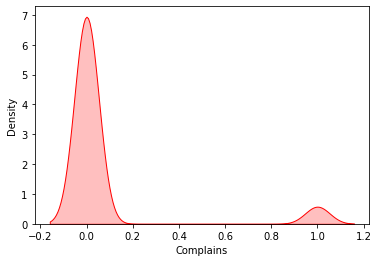

In [20]:
sns.kdeplot(data=df, x='Complains', color='r', shade=True)

<AxesSubplot:xlabel='Status', ylabel='Density'>

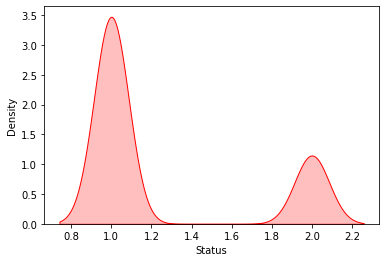

In [21]:
sns.kdeplot(data=df, x='Status', color='r', shade=True)

In [22]:
df.Status.describe()

count    3150.000000
mean        1.248254
std         0.432069
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Status, dtype: float64

In [23]:
df.Complains.describe()

count    3150.000000
mean        0.076508
std         0.265851
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complains, dtype: float64

In [24]:
df_stat = df[(df['Status'] >= 1.8) & (df['Complains'] >= 0.8)]
df_stat 

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
22,23.0,1.0,33.0,0.0,955.0,47.0,16.0,17.0,2.0,1.0,2.0,25.0,117.090,1.0
27,9.0,1.0,36.0,0.0,2268.0,44.0,34.0,31.0,3.0,1.0,2.0,30.0,228.480,1.0
31,0.0,1.0,36.0,0.0,628.0,7.0,9.0,4.0,4.0,1.0,2.0,45.0,38.375,1.0
111,6.0,1.0,36.0,0.0,2178.0,51.0,3.0,15.0,3.0,1.0,2.0,30.0,101.160,0.0
127,6.0,1.0,34.0,0.0,2208.0,41.0,29.0,29.0,3.0,1.0,2.0,30.0,205.960,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,14.0,1.0,37.0,0.0,3295.0,47.0,16.0,18.0,3.0,1.0,2.0,30.0,197.680,1.0
3122,28.0,1.0,35.0,0.0,1260.0,53.0,23.0,19.0,3.0,1.0,2.0,30.0,144.520,1.0
3126,14.0,1.0,37.0,0.0,3295.0,47.0,16.0,18.0,3.0,1.0,2.0,30.0,197.680,1.0
3127,14.0,1.0,38.0,0.0,2573.0,50.0,41.0,33.0,4.0,1.0,2.0,45.0,168.075,1.0


1.0    141
0.0     17
Name: Churn, dtype: int64

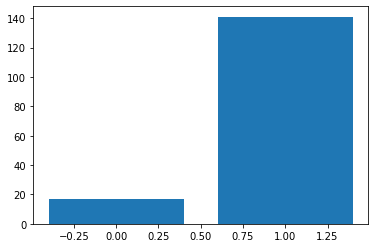

In [25]:
plt.bar(df_stat['Churn'].unique(), df_stat['Churn'].value_counts())
df_stat.Churn.value_counts()

In [26]:
(141/495 ) * 100

28.484848484848484

### 28.5% of All churn is linked to a customer complaint. Addressing the causes of the complaints would retain these customer. As there is no narrative data on the complaint it is uncertain at this stage what are the causes. The scope of using spark will allow for the scaling of the analytics platform to accomodate narrative data in the future and be able to integrate NLP to address the reasons for the complaints.

In [27]:
df_stat = df[(df['Status'] >= 1.8) & (df_stat['Complains'] >= 0.8) & (df_stat['Churn'] == 1)]
df_stat

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
22,23.0,1.0,33.0,0.0,955.0,47.0,16.0,17.0,2.0,1.0,2.0,25.0,117.090,1.0
27,9.0,1.0,36.0,0.0,2268.0,44.0,34.0,31.0,3.0,1.0,2.0,30.0,228.480,1.0
31,0.0,1.0,36.0,0.0,628.0,7.0,9.0,4.0,4.0,1.0,2.0,45.0,38.375,1.0
127,6.0,1.0,34.0,0.0,2208.0,41.0,29.0,29.0,3.0,1.0,2.0,30.0,205.960,1.0
128,0.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,30.0,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,14.0,1.0,37.0,0.0,3295.0,47.0,16.0,18.0,3.0,1.0,2.0,30.0,197.680,1.0
3122,28.0,1.0,35.0,0.0,1260.0,53.0,23.0,19.0,3.0,1.0,2.0,30.0,144.520,1.0
3126,14.0,1.0,37.0,0.0,3295.0,47.0,16.0,18.0,3.0,1.0,2.0,30.0,197.680,1.0
3127,14.0,1.0,38.0,0.0,2573.0,50.0,41.0,33.0,4.0,1.0,2.0,45.0,168.075,1.0


In [28]:
df_stat.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,141.000000,141.0,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.0
mean,11.595745,1.0,34.900709,0.0,1783.886525,36.517730,20.843972,17.943262,2.921986,1.007092,2.0,31.453901,145.909894,1.0
std,9.546861,0.0,5.208928,0.0,1122.282541,19.496008,17.476631,11.387821,0.666236,0.084215,0.0,6.801759,86.846298,0.0
min,0.000000,1.0,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.0,25.000000,0.000000,1.0
25%,4.000000,1.0,33.000000,0.0,910.000000,25.000000,7.000000,10.000000,2.000000,1.000000,2.0,25.000000,79.640000,1.0
50%,10.000000,1.0,35.000000,0.0,1960.000000,42.000000,18.000000,18.000000,3.000000,1.000000,2.0,30.000000,154.160000,1.0
75%,18.000000,1.0,38.000000,0.0,2685.000000,51.000000,31.000000,25.000000,3.000000,1.000000,2.0,30.000000,206.100000,1.0
max,34.000000,1.0,44.000000,0.0,4005.000000,64.000000,73.000000,46.000000,4.000000,2.000000,2.0,45.000000,336.880000,1.0


In [29]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [30]:
df_stat.Age.value_counts()

30.0    78
25.0    37
45.0    26
Name: Age, dtype: int64

In [31]:
df_stat['Tariff Plan'].value_counts()

1.0    140
2.0      1
Name: Tariff Plan, dtype: int64

### While we do not have access to narrative data from which to draw insights. We can get an understanding of the nature of the complains fromt he existing data.

- Age Group: 25-45 years old (81.5% of complains come from 25-35 year old age category)
- Tarrif Plan: 99% of complaints exist on Pay-as-you-go plan
- Subscription Lenght: On average 35 months.
- Customer Value: Customers churned who were associated with a complaint were had an average Customer Value of 146 compared to the whole dataset average score of 470. This may seem like a low number, but when compared to the total churn data which has an average customer value score of 125, we can see that at the 50 percentile range the custoemr value score is 97 and jumps to 181 at the 75 percentile. In terms of capturing churned customers, those customer associated with a complaint actually represent the higher end of customer value.
- Frequency of SMS is the highest predictor of customer value, this is presuming that SMS carries the highest network charge and as a result drives up the company bottom line.

In [32]:
df_maxVal = df[df['Churn'] == 1]
df_maxVal

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
16,0.0,0.0,37.0,0.0,875.0,14.0,0.0,11.0,2.0,1.0,2.0,25.0,40.005,1.0
18,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,25.0,0.000,1.0
22,23.0,1.0,33.0,0.0,955.0,47.0,16.0,17.0,2.0,1.0,2.0,25.0,117.090,1.0
24,13.0,1.0,36.0,1.0,5818.0,98.0,26.0,24.0,2.0,1.0,1.0,25.0,383.220,1.0
26,9.0,0.0,35.0,0.0,2990.0,41.0,9.0,16.0,3.0,1.0,2.0,30.0,157.240,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126,14.0,1.0,37.0,0.0,3295.0,47.0,16.0,18.0,3.0,1.0,2.0,30.0,197.680,1.0
3127,14.0,1.0,38.0,0.0,2573.0,50.0,41.0,33.0,4.0,1.0,2.0,45.0,168.075,1.0
3128,5.0,0.0,38.0,0.0,438.0,8.0,7.0,4.0,3.0,1.0,2.0,30.0,45.840,1.0
3131,5.0,1.0,38.0,0.0,933.0,13.0,16.0,6.0,4.0,1.0,2.0,45.0,63.650,1.0


In [33]:
df_maxVal.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.0
mean,7.476768,0.404040,31.894949,0.230303,1566.632323,29.133333,15.802020,12.391919,2.795960,1.012121,1.747475,30.636364,124.811414,1.0
std,7.831407,0.491202,9.469163,0.616483,1539.203365,26.323478,23.515289,10.867622,0.711945,0.109538,0.434900,6.886081,129.429850,0.0
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,25.000000,0.000000,1.0
25%,0.000000,0.000000,31.000000,0.000000,318.000000,6.000000,0.000000,2.000000,2.000000,1.000000,1.000000,25.000000,38.375000,1.0
50%,5.000000,0.000000,35.000000,0.000000,1182.000000,25.000000,9.000000,10.000000,3.000000,1.000000,2.000000,30.000000,96.840000,1.0
75%,11.000000,1.000000,37.000000,0.000000,2391.500000,45.500000,23.000000,20.000000,3.000000,1.000000,2.000000,30.000000,181.322500,1.0
max,34.000000,1.000000,45.000000,4.000000,6123.000000,100.000000,204.000000,48.000000,5.000000,2.000000,2.000000,55.000000,987.255000,1.0


In [34]:
df_maxVal.sort_values('Customer Value',ascending=False).head(25)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
388,6.0,1.0,30.0,1.0,1495.0,44.0,204.0,16.0,2.0,2.0,1.0,25.0,987.255,1.0
688,6.0,1.0,27.0,1.0,1505.0,37.0,202.0,14.0,2.0,2.0,1.0,25.0,978.390,1.0
988,4.0,1.0,27.0,1.0,1315.0,36.0,193.0,11.0,2.0,2.0,1.0,25.0,929.295,1.0
1088,0.0,1.0,25.0,0.0,1010.0,30.0,186.0,9.0,2.0,2.0,1.0,25.0,883.800,1.0
838,6.0,1.0,32.0,2.0,1315.0,42.0,201.0,12.0,3.0,2.0,1.0,30.0,858.280,1.0
1624,8.0,1.0,35.0,1.0,5628.0,98.0,51.0,26.0,2.0,1.0,1.0,25.0,487.170,1.0
674,15.0,0.0,36.0,1.0,6008.0,99.0,35.0,27.0,2.0,1.0,1.0,25.0,432.315,1.0
174,14.0,0.0,40.0,2.0,5898.0,100.0,36.0,28.0,2.0,1.0,1.0,25.0,431.910,1.0
1424,10.0,0.0,37.0,0.0,5693.0,100.0,30.0,27.0,2.0,1.0,1.0,25.0,395.685,1.0
2874,16.0,0.0,33.0,1.0,6123.0,98.0,25.0,25.0,2.0,1.0,1.0,25.0,392.445,1.0


## Data Modelling

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


2024-04-03 18:24:45.701992: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 18:24:46.012312: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 18:24:46.012402: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 18:24:46.089076: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 18:24:46.242885: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 18:24:46.244333: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [112]:
y = df['Churn']
X = df.drop('Churn',axis=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [114]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (2520, 13)
X_test Shape :  (630, 13)
y_train Shape :  (2520,)
y_test Shape :  (630,)


In [ ]:
best - 0.9634920634920635 <keras.src.optimizers.adagrad.Adagrad object at 0x79b65e5248e0> 7

In [ ]:
best_acc = 0
best_opt = None
best_mid_layer = None

for i in range(13):
    model = Sequential()
    model.add(Dense(units=13, activation='relu', input_dim=13))
    model.add(Dense(units=i+1, activation='relu', input_dim=i+1))
    model.add(Dense(units=1, activation='sigmoid'))
    
    optimizers = [keras.optimizers.RMSprop(),
                  'adam',
                  keras.optimizers.AdamW(),
                  keras.optimizers.Nadam(),
                  keras.optimizers.Adamax(), 
                  keras.optimizers.Adagrad(), 
                  keras.optimizers.Adadelta(), 
                  keras.optimizers.Adafactor(), 
                  keras.optimizers.Ftrl(), 
                  keras.optimizers.Lion(),
                  keras.optimizers.SGD()]
    for k in range(len(optimizers)):
        model.compile(loss='binary_crossentropy', optimizer= optimizers[k] , metrics=['accuracy'])
        model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)
        y_log = model.predict(X_test_scaled)
        y_pred = np.where(y_log > 0.5, 1, 0)
        acc = accuracy_score(y_test, y_pred)
        
        if acc > best_acc:
            best_mid_layer = i
            best_opt = optimizers[k]
            best_acc = acc
            
print(best_acc , best_opt, best_mid_layer)

In [47]:
best_acc = 0
best_act = None
best_loss_func = None
acc_metric = None
epoch_count = None

activation =  [
    'sigmoid',
    'relu',
    'leaky_relu'
]

for i in range(len(activation)):
    model = Sequential()
    model.add(Dense(units=13, activation='relu', input_dim=13))
    model.add(Dense(units=7, activation='relu', input_dim=7))
    model.add(Dense(units=1, activation=activation[i]))
    
    loss_function= ['binary_crossentropy', 'categorical_crossentropy']
    acc_score = ['accuracy','categorical_accuracy']
    for k in range(len(loss_function)):
        epoch_range = [100, 250, 500]
        for l in range(len(epoch_range)):
            model.compile(loss=loss_function[k], optimizer= keras.optimizers.Adagrad() , metrics=acc_score[k])
            model.fit(X_train_scaled, y_train, epochs = epoch_range[l], validation_split=0.2)
            y_log = model.predict(X_test_scaled)
            y_pred = np.where(y_log > 0.5, 1, 0)
            acc = accuracy_score(y_test, y_pred)

            if acc > best_acc:
                best_loss_func = loss_function[k]
                best_act = activation[i]
                best_acc = acc
                acc_metric = acc_score[k]
                epoch_count = epoch_range[l]
            
print(best_acc , best_act, best_loss_func, acc_metric, epoch_count)
    

Epoch 1/100
63/63 [==============================] - 0s 4ms/step - loss: 0.8028 - accuracy: 0.2912 - val_loss: 0.8061 - val_accuracy: 0.2679
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.3204 - val_loss: 0.7843 - val_accuracy: 0.3036
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7587 - accuracy: 0.3502 - val_loss: 0.7676 - val_accuracy: 0.3254
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7441 - accuracy: 0.3760 - val_loss: 0.7538 - val_accuracy: 0.3452
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.4048 - val_loss: 0.7420 - val_accuracy: 0.3810
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.4325 - val_loss: 0.7316 - val_accuracy: 0.3968
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.4524 - val_loss: 0.7223 - val_accuracy: 0.4325
Epoch 8/100
6

Epoch 59/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8958 - val_loss: 0.5432 - val_accuracy: 0.8869
Epoch 60/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.8963 - val_loss: 0.5414 - val_accuracy: 0.8889
Epoch 61/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.8973 - val_loss: 0.5396 - val_accuracy: 0.8909
Epoch 62/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.8983 - val_loss: 0.5378 - val_accuracy: 0.8909
Epoch 63/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.8993 - val_loss: 0.5361 - val_accuracy: 0.8909
Epoch 64/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.9003 - val_loss: 0.5343 - val_accuracy: 0.8889
Epoch 65/100
63/63 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.9008 - val_loss: 0.5326 - val_accuracy: 0.8889
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.9033 - val_loss: 0.4120 - val_accuracy: 0.8948
Epoch 17/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.9033 - val_loss: 0.4097 - val_accuracy: 0.8948
Epoch 18/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.9033 - val_loss: 0.4076 - val_accuracy: 0.8948
Epoch 19/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.9033 - val_loss: 0.4055 - val_accuracy: 0.8948
Epoch 20/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.9033 - val_loss: 0.4034 - val_accuracy: 0.8948
Epoch 21/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.9033 - val_loss: 0.4015 - val_accuracy: 0.8948
Epoch 22/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.9033 - val_loss: 0.3996 - val_accuracy: 0.8948
Epoch 23/250
63/63 

Epoch 74/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.9028 - val_loss: 0.3412 - val_accuracy: 0.8929
Epoch 75/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.9028 - val_loss: 0.3405 - val_accuracy: 0.8929
Epoch 76/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.9028 - val_loss: 0.3398 - val_accuracy: 0.8929
Epoch 77/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.9028 - val_loss: 0.3391 - val_accuracy: 0.8929
Epoch 78/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.9028 - val_loss: 0.3384 - val_accuracy: 0.8929
Epoch 79/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.9028 - val_loss: 0.3377 - val_accuracy: 0.8929
Epoch 80/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.9028 - val_loss: 0.3370 - val_accuracy: 0.8929
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.2985 - accuracy: 0.9028 - val_loss: 0.3105 - val_accuracy: 0.8929
Epoch 132/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2981 - accuracy: 0.9028 - val_loss: 0.3101 - val_accuracy: 0.8929
Epoch 133/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.9028 - val_loss: 0.3097 - val_accuracy: 0.8929
Epoch 134/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.9028 - val_loss: 0.3093 - val_accuracy: 0.8929
Epoch 135/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.9028 - val_loss: 0.3089 - val_accuracy: 0.8929
Epoch 136/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2965 - accuracy: 0.9028 - val_loss: 0.3085 - val_accuracy: 0.8929
Epoch 137/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2961 - accuracy: 0.9028 - val_loss: 0.3081 - val_accuracy: 0.8929
Epoch 138/250

63/63 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.9033 - val_loss: 0.2918 - val_accuracy: 0.8929
Epoch 189/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2797 - accuracy: 0.9033 - val_loss: 0.2915 - val_accuracy: 0.8929
Epoch 190/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2795 - accuracy: 0.9033 - val_loss: 0.2912 - val_accuracy: 0.8929
Epoch 191/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.9033 - val_loss: 0.2910 - val_accuracy: 0.8929
Epoch 192/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.9033 - val_loss: 0.2907 - val_accuracy: 0.8929
Epoch 193/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2787 - accuracy: 0.9033 - val_loss: 0.2904 - val_accuracy: 0.8929
Epoch 194/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.9033 - val_loss: 0.2902 - val_accuracy: 0.8929
Epoch 195/250

63/63 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.9038 - val_loss: 0.2789 - val_accuracy: 0.8948
Epoch 246/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.9038 - val_loss: 0.2787 - val_accuracy: 0.8948
Epoch 247/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.9038 - val_loss: 0.2785 - val_accuracy: 0.8948
Epoch 248/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9038 - val_loss: 0.2784 - val_accuracy: 0.8948
Epoch 249/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.9038 - val_loss: 0.2782 - val_accuracy: 0.8948
Epoch 250/250
20/20 [==============================] - 0s 840us/step
Epoch 1/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2654 - accuracy: 0.9038 - val_loss: 0.2760 - val_accuracy: 0.8948
Epoch 2/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2637 - accurac

63/63 [==============================] - 0s 2ms/step - loss: 0.2439 - accuracy: 0.9038 - val_loss: 0.2543 - val_accuracy: 0.8948
Epoch 53/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9038 - val_loss: 0.2541 - val_accuracy: 0.8948
Epoch 54/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2435 - accuracy: 0.9038 - val_loss: 0.2539 - val_accuracy: 0.8948
Epoch 55/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2434 - accuracy: 0.9038 - val_loss: 0.2537 - val_accuracy: 0.8948
Epoch 56/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9038 - val_loss: 0.2535 - val_accuracy: 0.8948
Epoch 57/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2430 - accuracy: 0.9038 - val_loss: 0.2534 - val_accuracy: 0.8948
Epoch 58/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2429 - accuracy: 0.9038 - val_loss: 0.2532 - val_accuracy: 0.8948
Epoch 59/500
63/63 

Epoch 110/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9038 - val_loss: 0.2467 - val_accuracy: 0.8948
Epoch 111/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2365 - accuracy: 0.9038 - val_loss: 0.2466 - val_accuracy: 0.8948
Epoch 112/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2364 - accuracy: 0.9038 - val_loss: 0.2465 - val_accuracy: 0.8948
Epoch 113/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9038 - val_loss: 0.2464 - val_accuracy: 0.8948
Epoch 114/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2362 - accuracy: 0.9038 - val_loss: 0.2463 - val_accuracy: 0.8948
Epoch 115/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9038 - val_loss: 0.2462 - val_accuracy: 0.8948
Epoch 116/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9038 - val_loss: 0.2461 - val_accuracy: 0.8948

63/63 [==============================] - 0s 3ms/step - loss: 0.2324 - accuracy: 0.9048 - val_loss: 0.2424 - val_accuracy: 0.8948
Epoch 168/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9048 - val_loss: 0.2423 - val_accuracy: 0.8948
Epoch 169/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2323 - accuracy: 0.9048 - val_loss: 0.2423 - val_accuracy: 0.8968
Epoch 170/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2322 - accuracy: 0.9048 - val_loss: 0.2422 - val_accuracy: 0.8968
Epoch 171/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9048 - val_loss: 0.2422 - val_accuracy: 0.8968
Epoch 172/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.9048 - val_loss: 0.2421 - val_accuracy: 0.8968
Epoch 173/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2321 - accuracy: 0.9048 - val_loss: 0.2421 - val_accuracy: 0.8968
Epoch 174/500

63/63 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9048 - val_loss: 0.2397 - val_accuracy: 0.8968
Epoch 225/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9048 - val_loss: 0.2396 - val_accuracy: 0.8968
Epoch 226/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2295 - accuracy: 0.9048 - val_loss: 0.2396 - val_accuracy: 0.8968
Epoch 227/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9048 - val_loss: 0.2395 - val_accuracy: 0.8968
Epoch 228/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9048 - val_loss: 0.2395 - val_accuracy: 0.8968
Epoch 229/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9048 - val_loss: 0.2395 - val_accuracy: 0.8968
Epoch 230/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.9048 - val_loss: 0.2394 - val_accuracy: 0.8968
Epoch 231/500

63/63 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9048 - val_loss: 0.2377 - val_accuracy: 0.8968
Epoch 282/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2274 - accuracy: 0.9048 - val_loss: 0.2376 - val_accuracy: 0.8968
Epoch 283/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9048 - val_loss: 0.2376 - val_accuracy: 0.8968
Epoch 284/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9048 - val_loss: 0.2376 - val_accuracy: 0.8968
Epoch 285/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9048 - val_loss: 0.2375 - val_accuracy: 0.8968
Epoch 286/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9048 - val_loss: 0.2375 - val_accuracy: 0.8968
Epoch 287/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9048 - val_loss: 0.2375 - val_accuracy: 0.8968
Epoch 288/500

63/63 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9048 - val_loss: 0.2360 - val_accuracy: 0.8968
Epoch 339/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9048 - val_loss: 0.2360 - val_accuracy: 0.8968
Epoch 340/500
63/63 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9048 - val_loss: 0.2360 - val_accuracy: 0.8968
Epoch 341/500
63/63 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9048 - val_loss: 0.2359 - val_accuracy: 0.8968
Epoch 342/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9048 - val_loss: 0.2359 - val_accuracy: 0.8968
Epoch 343/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9048 - val_loss: 0.2359 - val_accuracy: 0.8968
Epoch 344/500
63/63 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9048 - val_loss: 0.2359 - val_accuracy: 0.8968
Epoch 345/500

63/63 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9053 - val_loss: 0.2346 - val_accuracy: 0.8968
Epoch 396/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9053 - val_loss: 0.2346 - val_accuracy: 0.8968
Epoch 397/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9053 - val_loss: 0.2346 - val_accuracy: 0.8968
Epoch 398/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9053 - val_loss: 0.2346 - val_accuracy: 0.8968
Epoch 399/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9053 - val_loss: 0.2345 - val_accuracy: 0.8968
Epoch 400/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9053 - val_loss: 0.2345 - val_accuracy: 0.8968
Epoch 401/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9053 - val_loss: 0.2345 - val_accuracy: 0.8968
Epoch 402/500

63/63 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9053 - val_loss: 0.2334 - val_accuracy: 0.8968
Epoch 453/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9053 - val_loss: 0.2334 - val_accuracy: 0.8968
Epoch 454/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9053 - val_loss: 0.2334 - val_accuracy: 0.8968
Epoch 455/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9053 - val_loss: 0.2334 - val_accuracy: 0.8968
Epoch 456/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9053 - val_loss: 0.2334 - val_accuracy: 0.8968
Epoch 457/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9053 - val_loss: 0.2333 - val_accuracy: 0.8968
Epoch 458/500
63/63 [==============================] - 0s 2ms/step - loss: 0.2227 - accuracy: 0.9053 - val_loss: 0.2333 - val_accuracy: 0.8968
Epoch 459/500

63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 11/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 12/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_

63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 55/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 56/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 57/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 58/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 59/100
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - va

20/20 [==============================] - 0s 2ms/step
Epoch 1/250
63/63 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 4/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 5/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 6/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+0

Epoch 48/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 49/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 50/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 51/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 52/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 53/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.

63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 96/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 97/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 98/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 99/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 100/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - v

Epoch 142/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 143/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 144/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 145/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 146/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 147/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 189/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 190/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 191/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 192/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 193/250
63/63 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 194/250
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 236/250
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 237/250
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 238/250
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 239/250
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 240/250
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 241/250
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 33/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 34/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 35/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 36/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 37/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 38/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.

63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 81/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 82/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 83/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 84/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 85/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - va

63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 128/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 129/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 130/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 131/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 132/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00

Epoch 174/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 175/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 176/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 177/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 178/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 179/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 221/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 222/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 223/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 224/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 225/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 226/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 268/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 269/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 270/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 271/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 272/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 273/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 315/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 316/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 317/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 318/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 319/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 320/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 362/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 363/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 364/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 365/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 366/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 367/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 409/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 410/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 411/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 412/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 413/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 414/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 456/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 457/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 458/500
63/63 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 459/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 460/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 461/500
63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_lo

Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 7/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 8/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 10/100


Epoch 61/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 62/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 63/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 64/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 65/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 66/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 67/100
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 19/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 20/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 21/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 22/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 23/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 24/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 25/250
63/63 

Epoch 76/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 77/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 78/250
63/63 [==============================] - 0s 4ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 79/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 80/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 81/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 82/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 134/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 135/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 136/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 137/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 138/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 139/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 140/250

63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 191/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 192/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 193/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 194/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 195/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 196/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 197/250

63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 248/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 249/250
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 250/250
20/20 [==============================] - 0s 991us/step
Epoch 1/500
63/63 [==============================] - 1s 4ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 3/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 4/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0

63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 55/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 56/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 57/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 58/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 59/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 60/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 61/500
63/63 

Epoch 112/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 113/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 114/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 115/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 116/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 117/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 118/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532

63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 170/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 171/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 172/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 173/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 174/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 175/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 176/500

63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 227/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 228/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 229/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 230/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 231/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 232/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 233/500

63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 284/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 285/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 286/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 287/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 288/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 289/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 290/500

63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 341/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 342/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 343/500
63/63 [==============================] - 0s 4ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 344/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 345/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 346/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 347/500

63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 398/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 399/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 400/500
63/63 [==============================] - 0s 4ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 401/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 402/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 403/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 404/500

63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 455/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 456/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 457/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 458/500
63/63 [==============================] - 0s 2ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 459/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 460/500
63/63 [==============================] - 0s 3ms/step - loss: 2.3872 - accuracy: 0.8452 - val_loss: 2.2648 - val_accuracy: 0.8532
Epoch 461/500

63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 11/100
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 12/100
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 13/100
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 14/100
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 15/100
63/63 [==============================] - 0s 4ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 16/100
63/63 [==============================] -

63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 62/100
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 63/100
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 64/100
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 65/100
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 66/100
63/63 [==============================] - 0s 4ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 67/100
63/63 [==============================] -

Epoch 12/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 13/250
63/63 [==============================] - 0s 4ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 14/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 15/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 16/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 17/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 18/250
63/63 [====================

63/63 [==============================] - 0s 4ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 64/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 65/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 66/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 67/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 68/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 69/250
63/63 [==============================] -

63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 115/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 116/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 117/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 118/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 119/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 120/250
63/63 [===========================

Epoch 165/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 166/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 167/250
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 168/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 169/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 170/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 171/250
63/63 [=============

Epoch 216/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 217/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 218/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 219/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 220/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 221/250
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 222/250
63/63 [=============

Epoch 17/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 18/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 19/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 20/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 21/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 22/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 23/500
63/63 [====================

63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 69/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 70/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 71/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 72/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 73/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 74/500
63/63 [==============================] -

63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 120/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 121/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 122/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 123/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 124/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 125/500
63/63 [===========================

Epoch 170/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 171/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 172/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 173/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 174/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 175/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 176/500
63/63 [=============

Epoch 221/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 222/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 223/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 224/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 225/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 226/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 227/500
63/63 [=============

Epoch 272/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 273/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 274/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 275/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 276/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 277/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 278/500
63/63 [=============

Epoch 323/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 324/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 325/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 326/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 327/500
63/63 [==============================] - 0s 3ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 328/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 329/500
63/63 [=============

Epoch 374/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 375/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 376/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 377/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 378/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 379/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 380/500
63/63 [=============

Epoch 425/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 426/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 427/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 428/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 429/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 430/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 431/500
63/63 [=============

Epoch 476/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 477/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 478/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 479/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 480/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 481/500
63/63 [==============================] - 0s 2ms/step - loss: nan - categorical_accuracy: 1.0000 - val_loss: nan - val_categorical_accuracy: 1.0000
Epoch 482/500
63/63 [=============

63/63 [==============================] - 0s 2ms/step - loss: 0.8864 - accuracy: 0.8239 - val_loss: 0.9477 - val_accuracy: 0.8175
Epoch 31/100
63/63 [==============================] - 0s 2ms/step - loss: 0.8730 - accuracy: 0.8254 - val_loss: 0.9214 - val_accuracy: 0.8194
Epoch 32/100
63/63 [==============================] - 0s 2ms/step - loss: 0.8684 - accuracy: 0.8254 - val_loss: 0.9187 - val_accuracy: 0.8194
Epoch 33/100
63/63 [==============================] - 0s 2ms/step - loss: 0.8486 - accuracy: 0.8254 - val_loss: 0.9139 - val_accuracy: 0.8214
Epoch 34/100
63/63 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.8254 - val_loss: 0.9119 - val_accuracy: 0.8214
Epoch 35/100
63/63 [==============================] - 0s 2ms/step - loss: 0.8318 - accuracy: 0.8274 - val_loss: 0.8644 - val_accuracy: 0.8234
Epoch 36/100
63/63 [==============================] - 0s 2ms/step - loss: 0.8255 - accuracy: 0.8299 - val_loss: 0.8635 - val_accuracy: 0.8234
Epoch 37/100
63/63 

Epoch 88/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7881 - accuracy: 0.8507 - val_loss: 0.8347 - val_accuracy: 0.8373
Epoch 89/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7878 - accuracy: 0.8507 - val_loss: 0.8344 - val_accuracy: 0.8373
Epoch 90/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7874 - accuracy: 0.8502 - val_loss: 0.8340 - val_accuracy: 0.8373
Epoch 91/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.8502 - val_loss: 0.8313 - val_accuracy: 0.8393
Epoch 92/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7808 - accuracy: 0.8512 - val_loss: 0.8309 - val_accuracy: 0.8393
Epoch 93/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7804 - accuracy: 0.8512 - val_loss: 0.8305 - val_accuracy: 0.8413
Epoch 94/100
63/63 [==============================] - 0s 2ms/step - loss: 0.7800 - accuracy: 0.8502 - val_loss: 0.8301 - val_accuracy: 0.8413
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.8874 - val_loss: 0.7305 - val_accuracy: 0.8730
Epoch 46/250
63/63 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.8874 - val_loss: 0.7407 - val_accuracy: 0.8750
Epoch 47/250
63/63 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.8874 - val_loss: 0.7404 - val_accuracy: 0.8750
Epoch 48/250
63/63 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.8874 - val_loss: 0.7402 - val_accuracy: 0.8750
Epoch 49/250
63/63 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.8874 - val_loss: 0.7400 - val_accuracy: 0.8750
Epoch 50/250
63/63 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.8874 - val_loss: 0.7398 - val_accuracy: 0.8750
Epoch 51/250
63/63 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.8874 - val_loss: 0.7397 - val_accuracy: 0.8750
Epoch 52/250
63/63 

Epoch 103/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.8904 - val_loss: 0.7327 - val_accuracy: 0.8810
Epoch 104/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.8909 - val_loss: 0.7326 - val_accuracy: 0.8810
Epoch 105/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.8909 - val_loss: 0.7240 - val_accuracy: 0.8810
Epoch 106/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.8914 - val_loss: 0.7200 - val_accuracy: 0.8829
Epoch 107/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.8914 - val_loss: 0.7185 - val_accuracy: 0.8849
Epoch 108/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.8909 - val_loss: 0.7179 - val_accuracy: 0.8849
Epoch 109/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.8914 - val_loss: 0.7171 - val_accuracy: 0.8849

63/63 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.8943 - val_loss: 0.7087 - val_accuracy: 0.8889
Epoch 161/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.8948 - val_loss: 0.7086 - val_accuracy: 0.8889
Epoch 162/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.8943 - val_loss: 0.7085 - val_accuracy: 0.8889
Epoch 163/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.8943 - val_loss: 0.7085 - val_accuracy: 0.8889
Epoch 164/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.8943 - val_loss: 0.7084 - val_accuracy: 0.8889
Epoch 165/250
63/63 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.8943 - val_loss: 0.7083 - val_accuracy: 0.8889
Epoch 166/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.8943 - val_loss: 0.7083 - val_accuracy: 0.8889
Epoch 167/250

63/63 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.8953 - val_loss: 0.7056 - val_accuracy: 0.8889
Epoch 218/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.8953 - val_loss: 0.7055 - val_accuracy: 0.8889
Epoch 219/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.8953 - val_loss: 0.7055 - val_accuracy: 0.8889
Epoch 220/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.8953 - val_loss: 0.7055 - val_accuracy: 0.8889
Epoch 221/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.8953 - val_loss: 0.7055 - val_accuracy: 0.8889
Epoch 222/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.8958 - val_loss: 0.7054 - val_accuracy: 0.8889
Epoch 223/250
63/63 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.8953 - val_loss: 0.7054 - val_accuracy: 0.8909
Epoch 224/250

63/63 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.8993 - val_loss: 0.6626 - val_accuracy: 0.8909
Epoch 25/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.8998 - val_loss: 0.6632 - val_accuracy: 0.8909
Epoch 26/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.9003 - val_loss: 0.6644 - val_accuracy: 0.8909
Epoch 27/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.8993 - val_loss: 0.6823 - val_accuracy: 0.8909
Epoch 28/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6442 - accuracy: 0.8988 - val_loss: 0.6820 - val_accuracy: 0.8909
Epoch 29/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.8988 - val_loss: 0.6819 - val_accuracy: 0.8929
Epoch 30/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.8988 - val_loss: 0.6817 - val_accuracy: 0.8948
Epoch 31/500
63/63 

Epoch 82/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.9018 - val_loss: 0.6775 - val_accuracy: 0.8988
Epoch 83/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.9023 - val_loss: 0.6768 - val_accuracy: 0.8948
Epoch 84/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.8993 - val_loss: 0.6767 - val_accuracy: 0.8948
Epoch 85/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6278 - accuracy: 0.8993 - val_loss: 0.6767 - val_accuracy: 0.8948
Epoch 86/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.8993 - val_loss: 0.6767 - val_accuracy: 0.8948
Epoch 87/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.8993 - val_loss: 0.6767 - val_accuracy: 0.8948
Epoch 88/500
63/63 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.8993 - val_loss: 0.6767 - val_accuracy: 0.8948
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.9023 - val_loss: 0.6738 - val_accuracy: 0.8869
Epoch 140/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.9028 - val_loss: 0.6738 - val_accuracy: 0.8869
Epoch 141/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.9023 - val_loss: 0.6738 - val_accuracy: 0.8869
Epoch 142/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.9023 - val_loss: 0.6738 - val_accuracy: 0.8869
Epoch 143/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.9023 - val_loss: 0.6737 - val_accuracy: 0.8869
Epoch 144/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.9023 - val_loss: 0.6737 - val_accuracy: 0.8869
Epoch 145/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5970 - accuracy: 0.9023 - val_loss: 0.6737 - val_accuracy: 0.8869
Epoch 146/500

63/63 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.9018 - val_loss: 0.6732 - val_accuracy: 0.8869
Epoch 197/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.9018 - val_loss: 0.6732 - val_accuracy: 0.8869
Epoch 198/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5951 - accuracy: 0.9018 - val_loss: 0.6732 - val_accuracy: 0.8869
Epoch 199/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.9018 - val_loss: 0.6610 - val_accuracy: 0.8869
Epoch 200/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5951 - accuracy: 0.9018 - val_loss: 0.6595 - val_accuracy: 0.8869
Epoch 201/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5950 - accuracy: 0.9023 - val_loss: 0.6587 - val_accuracy: 0.8869
Epoch 202/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.9023 - val_loss: 0.6581 - val_accuracy: 0.8869
Epoch 203/500

63/63 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.9008 - val_loss: 0.6384 - val_accuracy: 0.8810
Epoch 254/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.9008 - val_loss: 0.6380 - val_accuracy: 0.8810
Epoch 255/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.9008 - val_loss: 0.6376 - val_accuracy: 0.8810
Epoch 256/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.9008 - val_loss: 0.6373 - val_accuracy: 0.8810
Epoch 257/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.9008 - val_loss: 0.6370 - val_accuracy: 0.8810
Epoch 258/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.9008 - val_loss: 0.6367 - val_accuracy: 0.8810
Epoch 259/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5813 - accuracy: 0.9008 - val_loss: 0.6365 - val_accuracy: 0.8810
Epoch 260/500

63/63 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.9013 - val_loss: 0.6309 - val_accuracy: 0.8829
Epoch 311/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.9013 - val_loss: 0.6309 - val_accuracy: 0.8829
Epoch 312/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.9013 - val_loss: 0.6308 - val_accuracy: 0.8829
Epoch 313/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.9013 - val_loss: 0.6308 - val_accuracy: 0.8829
Epoch 314/500
63/63 [==============================] - 0s 3ms/step - loss: 0.5803 - accuracy: 0.9018 - val_loss: 0.6307 - val_accuracy: 0.8829
Epoch 315/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.9018 - val_loss: 0.6307 - val_accuracy: 0.8829
Epoch 316/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5803 - accuracy: 0.9018 - val_loss: 0.6306 - val_accuracy: 0.8829
Epoch 317/500

63/63 [==============================] - 0s 2ms/step - loss: 0.5796 - accuracy: 0.9033 - val_loss: 0.6143 - val_accuracy: 0.8849
Epoch 368/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.9033 - val_loss: 0.6138 - val_accuracy: 0.8849
Epoch 369/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.9038 - val_loss: 0.6134 - val_accuracy: 0.8849
Epoch 370/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.9038 - val_loss: 0.6130 - val_accuracy: 0.8849
Epoch 371/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.9038 - val_loss: 0.6127 - val_accuracy: 0.8849
Epoch 372/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.9038 - val_loss: 0.6125 - val_accuracy: 0.8849
Epoch 373/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.9038 - val_loss: 0.6122 - val_accuracy: 0.8849
Epoch 374/500

63/63 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.9038 - val_loss: 0.6076 - val_accuracy: 0.8869
Epoch 425/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.9038 - val_loss: 0.6075 - val_accuracy: 0.8869
Epoch 426/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.9038 - val_loss: 0.6075 - val_accuracy: 0.8869
Epoch 427/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.9038 - val_loss: 0.6074 - val_accuracy: 0.8869
Epoch 428/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.9038 - val_loss: 0.6074 - val_accuracy: 0.8869
Epoch 429/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.9038 - val_loss: 0.6073 - val_accuracy: 0.8869
Epoch 430/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.9038 - val_loss: 0.6073 - val_accuracy: 0.8869
Epoch 431/500

63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.9048 - val_loss: 0.6056 - val_accuracy: 0.8889
Epoch 482/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.9048 - val_loss: 0.6056 - val_accuracy: 0.8889
Epoch 483/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.9048 - val_loss: 0.6056 - val_accuracy: 0.8889
Epoch 484/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.9048 - val_loss: 0.6055 - val_accuracy: 0.8889
Epoch 485/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.9048 - val_loss: 0.6055 - val_accuracy: 0.8889
Epoch 486/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.9048 - val_loss: 0.6055 - val_accuracy: 0.8889
Epoch 487/500
63/63 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.9048 - val_loss: 0.6055 - val_accuracy: 0.8889
Epoch 488/500

63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 32/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 33/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 34/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 35/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 36/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - va

63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 79/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 80/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 81/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 82/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 83/100
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - va

Epoch 25/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 26/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 27/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 28/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 29/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 30/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.

63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 73/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 74/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 75/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 76/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 77/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - va

63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 120/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 121/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 122/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 123/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 124/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08

Epoch 166/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 167/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 168/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 169/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 170/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 171/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 213/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 214/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 215/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 216/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 217/250
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 218/250
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 10/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 11/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 12/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 13/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 14/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - va

63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 57/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 58/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 59/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 60/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 61/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - va

63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 104/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 105/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 106/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 107/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 108/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08

Epoch 150/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 151/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 152/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 153/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 154/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 155/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 197/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 198/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 199/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 200/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 201/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 202/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 244/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 245/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 246/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 247/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 248/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 249/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 291/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 292/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 293/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 294/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 295/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 296/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 338/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 339/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 340/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 341/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 342/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 343/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 385/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 386/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 387/500
63/63 [==============================] - 0s 3ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 388/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 389/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 390/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 432/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 433/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 434/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 435/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 436/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 437/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo

Epoch 479/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 480/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 481/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 482/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 483/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_loss: 1.7503e-08 - val_categorical_accuracy: 1.0000
Epoch 484/500
63/63 [==============================] - 0s 2ms/step - loss: 1.8449e-08 - categorical_accuracy: 1.0000 - val_lo


<b>best in accuracy:</b> 0.8888888888888888 sigmoid binary_crossentropy accuracy 250 7 layers


In [116]:
model = Sequential()
model.add(Dense(units=13, activation='relu', input_dim=13))
model.add(Dense(units=7, activation='relu', input_dim=7))
model.add(Dense(units=1, activation='sigmoid'))

history = model.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adagrad() , metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs = 250, validation_split=0.2)

Epoch 1/250
63/63 [==============================] - 1s 4ms/step - loss: 0.6650 - accuracy: 0.6815 - val_loss: 0.6512 - val_accuracy: 0.6885
Epoch 2/250
63/63 [==============================] - 0s 4ms/step - loss: 0.6220 - accuracy: 0.7326 - val_loss: 0.6182 - val_accuracy: 0.7083
Epoch 3/250
63/63 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.7505 - val_loss: 0.5943 - val_accuracy: 0.7401
Epoch 4/250
63/63 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.7713 - val_loss: 0.5756 - val_accuracy: 0.7579
Epoch 5/250
63/63 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.8001 - val_loss: 0.5601 - val_accuracy: 0.7937
Epoch 6/250
63/63 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.8249 - val_loss: 0.5469 - val_accuracy: 0.8214
Epoch 7/250
63/63 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.8353 - val_loss: 0.5354 - val_accuracy: 0.8373
Epoch 8/250
6

Epoch 59/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3611 - accuracy: 0.8547 - val_loss: 0.3623 - val_accuracy: 0.8611
Epoch 60/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8542 - val_loss: 0.3610 - val_accuracy: 0.8611
Epoch 61/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8557 - val_loss: 0.3597 - val_accuracy: 0.8611
Epoch 62/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3573 - accuracy: 0.8562 - val_loss: 0.3585 - val_accuracy: 0.8631
Epoch 63/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8562 - val_loss: 0.3572 - val_accuracy: 0.8631
Epoch 64/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8566 - val_loss: 0.3560 - val_accuracy: 0.8631
Epoch 65/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8576 - val_loss: 0.3549 - val_accuracy: 0.8631
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8909 - val_loss: 0.3140 - val_accuracy: 0.8810
Epoch 117/250
63/63 [==============================] - 0s 2ms/step - loss: 0.3117 - accuracy: 0.8909 - val_loss: 0.3135 - val_accuracy: 0.8810
Epoch 118/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8914 - val_loss: 0.3129 - val_accuracy: 0.8810
Epoch 119/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 0.8914 - val_loss: 0.3124 - val_accuracy: 0.8810
Epoch 120/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3100 - accuracy: 0.8924 - val_loss: 0.3118 - val_accuracy: 0.8810
Epoch 121/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8924 - val_loss: 0.3113 - val_accuracy: 0.8810
Epoch 122/250
63/63 [==============================] - 0s 3ms/step - loss: 0.3089 - accuracy: 0.8929 - val_loss: 0.3108 - val_accuracy: 0.8810
Epoch 123/250

63/63 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8958 - val_loss: 0.2896 - val_accuracy: 0.8869
Epoch 174/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8958 - val_loss: 0.2893 - val_accuracy: 0.8869
Epoch 175/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8958 - val_loss: 0.2890 - val_accuracy: 0.8869
Epoch 176/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8958 - val_loss: 0.2887 - val_accuracy: 0.8869
Epoch 177/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8958 - val_loss: 0.2884 - val_accuracy: 0.8869
Epoch 178/250
63/63 [==============================] - 0s 3ms/step - loss: 0.2849 - accuracy: 0.8958 - val_loss: 0.2880 - val_accuracy: 0.8869
Epoch 179/250
63/63 [==============================] - 0s 4ms/step - loss: 0.2846 - accuracy: 0.8958 - val_loss: 0.2877 - val_accuracy: 0.8869
Epoch 180/250

63/63 [==============================] - 0s 2ms/step - loss: 0.2704 - accuracy: 0.9003 - val_loss: 0.2743 - val_accuracy: 0.8889
Epoch 231/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.9003 - val_loss: 0.2741 - val_accuracy: 0.8889
Epoch 232/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2700 - accuracy: 0.9003 - val_loss: 0.2738 - val_accuracy: 0.8889
Epoch 233/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2697 - accuracy: 0.9003 - val_loss: 0.2736 - val_accuracy: 0.8889
Epoch 234/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9003 - val_loss: 0.2734 - val_accuracy: 0.8889
Epoch 235/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9003 - val_loss: 0.2732 - val_accuracy: 0.8889
Epoch 236/250
63/63 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.9003 - val_loss: 0.2730 - val_accuracy: 0.8889
Epoch 237/250

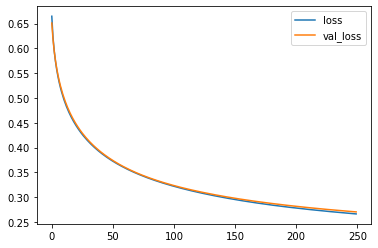

In [117]:
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend(loc="upper left")
plt.legend()

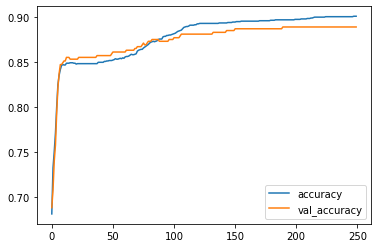

In [118]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.legend(loc="upper left")
plt.legend()

In [119]:
y_log = model.predict(X_test_scaled)

20/20 [==============================] - 0s 1ms/step


In [120]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [251]:
result_unbalanced = accuracy_score(y_test, y_pred)*100
print('%.2f' % result_unbalanced, "% accuracy")

95.24 % accuracy


In [252]:
acc.append(result_unbalanced)
model.append('Single_Layer Perceptron')

## handling imbalanced dataset

In [82]:
from sklearn.utils import resample
# Separate majority and minority classes
majority_class = df[df['Churn'] == 0]
minority_class = df[df['Churn'] == 1]

# Upsample the minority class
upsampled_minority = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number of majority class samples
                              random_state=0)  # Set random state for reproducibility

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([majority_class, upsampled_minority])
balanced_data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8.0,0.0,38.0,0.0,4370.0,71.0,5.0,17.0,3.0,1.0,1.0,30.0,197.640,0.0
1,0.0,0.0,39.0,0.0,318.0,5.0,7.0,4.0,2.0,1.0,2.0,25.0,46.035,0.0
2,10.0,0.0,37.0,0.0,2453.0,60.0,359.0,24.0,3.0,1.0,1.0,30.0,1536.520,0.0
3,10.0,0.0,38.0,0.0,4198.0,66.0,1.0,35.0,1.0,1.0,1.0,15.0,240.020,0.0
4,3.0,0.0,38.0,0.0,2393.0,58.0,2.0,33.0,1.0,1.0,1.0,15.0,145.805,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2.0,0.0,5.0,0.0,1408.0,17.0,0.0,3.0,3.0,1.0,1.0,30.0,57.000,1.0
2978,11.0,0.0,39.0,0.0,1148.0,19.0,15.0,4.0,3.0,1.0,2.0,30.0,106.680,1.0
2027,4.0,1.0,34.0,0.0,1963.0,38.0,27.0,29.0,3.0,1.0,2.0,30.0,188.040,1.0
949,0.0,0.0,8.0,0.0,777.0,8.0,0.0,7.0,3.0,1.0,1.0,30.0,31.400,1.0


0.0    2655
1.0    2655
Name: Churn, dtype: int64

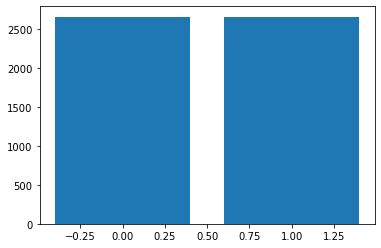

In [92]:
plt.bar(balanced_data['Churn'].unique(), balanced_data['Churn'].value_counts())
balanced_data.Churn.value_counts()

In [93]:
y = balanced_data['Churn']
X = balanced_data.drop('Churn',axis=1)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [95]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
# check the shape of X_train & X_test, y_train & y_test
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (4248, 13)
X_test Shape :  (1062, 13)
y_train Shape :  (4248,)
y_test Shape :  (1062,)


In [97]:
model = Sequential()
model.add(Dense(units=13, activation='relu', input_dim=13))
model.add(Dense(units=7, activation='relu', input_dim=7))
model.add(Dense(units=1, activation='sigmoid'))

history = model.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adagrad() , metrics='accuracy')
history = model.fit(X_train_scaled, y_train, epochs = 250, validation_split=0.2)

Epoch 1/250
107/107 [==============================] - 1s 3ms/step - loss: 0.7701 - accuracy: 0.5291 - val_loss: 0.7349 - val_accuracy: 0.5318
Epoch 2/250
107/107 [==============================] - 0s 2ms/step - loss: 0.7313 - accuracy: 0.5412 - val_loss: 0.7073 - val_accuracy: 0.5576
Epoch 3/250
107/107 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.5568 - val_loss: 0.6873 - val_accuracy: 0.5706
Epoch 4/250
107/107 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5706 - val_loss: 0.6718 - val_accuracy: 0.5788
Epoch 5/250
107/107 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5818 - val_loss: 0.6590 - val_accuracy: 0.5871
Epoch 6/250
107/107 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6004 - val_loss: 0.6481 - val_accuracy: 0.6012
Epoch 7/250
107/107 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.6157 - val_loss: 0.6388 - val_accuracy: 0.6094

Epoch 58/250
107/107 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.8290 - val_loss: 0.4637 - val_accuracy: 0.8094
Epoch 59/250
107/107 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.8293 - val_loss: 0.4617 - val_accuracy: 0.8106
Epoch 60/250
107/107 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.8296 - val_loss: 0.4598 - val_accuracy: 0.8118
Epoch 61/250
107/107 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.8314 - val_loss: 0.4579 - val_accuracy: 0.8118
Epoch 62/250
107/107 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8305 - val_loss: 0.4560 - val_accuracy: 0.8118
Epoch 63/250
107/107 [==============================] - 0s 4ms/step - loss: 0.4432 - accuracy: 0.8311 - val_loss: 0.4541 - val_accuracy: 0.8129
Epoch 64/250
107/107 [==============================] - 0s 4ms/step - loss: 0.4411 - accuracy: 0.8323 - val_loss: 0.4523 - val_accuracy:

Epoch 115/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.8411 - val_loss: 0.3953 - val_accuracy: 0.8282
Epoch 116/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8411 - val_loss: 0.3946 - val_accuracy: 0.8282
Epoch 117/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.8411 - val_loss: 0.3940 - val_accuracy: 0.8282
Epoch 118/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8411 - val_loss: 0.3933 - val_accuracy: 0.8282
Epoch 119/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8411 - val_loss: 0.3927 - val_accuracy: 0.8282
Epoch 120/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8411 - val_loss: 0.3920 - val_accuracy: 0.8282
Epoch 121/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8411 - val_loss: 0.3914 - val_ac

107/107 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8549 - val_loss: 0.3678 - val_accuracy: 0.8424
Epoch 172/250
107/107 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8552 - val_loss: 0.3675 - val_accuracy: 0.8424
Epoch 173/250
107/107 [==============================] - 0s 3ms/step - loss: 0.3478 - accuracy: 0.8552 - val_loss: 0.3671 - val_accuracy: 0.8424
Epoch 174/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8558 - val_loss: 0.3668 - val_accuracy: 0.8424
Epoch 175/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8558 - val_loss: 0.3664 - val_accuracy: 0.8435
Epoch 176/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8564 - val_loss: 0.3661 - val_accuracy: 0.8435
Epoch 177/250
107/107 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8567 - val_loss: 0.3657 - val_accuracy: 0.8435

107/107 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8590 - val_loss: 0.3521 - val_accuracy: 0.8482
Epoch 228/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8593 - val_loss: 0.3519 - val_accuracy: 0.8482
Epoch 229/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8593 - val_loss: 0.3517 - val_accuracy: 0.8482
Epoch 230/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8593 - val_loss: 0.3514 - val_accuracy: 0.8482
Epoch 231/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8602 - val_loss: 0.3512 - val_accuracy: 0.8482
Epoch 232/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8602 - val_loss: 0.3510 - val_accuracy: 0.8482
Epoch 233/250
107/107 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8605 - val_loss: 0.3508 - val_accuracy: 0.8482

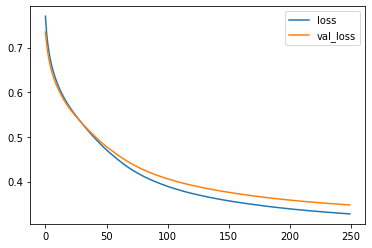

In [98]:
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend(loc="upper left")
plt.legend()

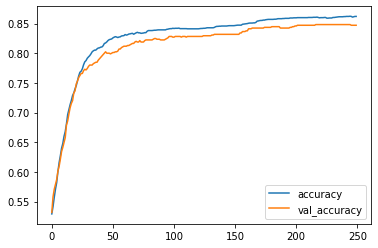

In [99]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.legend(loc="upper left")
plt.legend()

In [100]:
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log > 0.5, 1, 0)
result_balanced = accuracy_score(y_test, y_pred)*100
print('%.2f' % result_balanced, "% accuracy")

34/34 [==============================] - 0s 1ms/step
86.63 % accuracy


## ML Algorithms Modelling

In [122]:
acc = []
model = []

In [123]:
acc.append(result_unbalanced*100)
model.append('Single-layer Perceptron')

In [210]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [101]:
y = df['Churn']
X = df.drop('Churn',axis=1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Logistic Regression (LR)

In [127]:
# Initialising Logistic regression model and generating a prediction
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Generating prediction
predicted_values = logreg.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

In [130]:
print("Logistic Regression's Accuracy is: ", x , "%")
print(" ")
print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.846031746031746 %
 
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       521
         1.0       0.69      0.20      0.31       109

    accuracy                           0.85       630
   macro avg       0.77      0.59      0.61       630
weighted avg       0.83      0.85      0.81       630



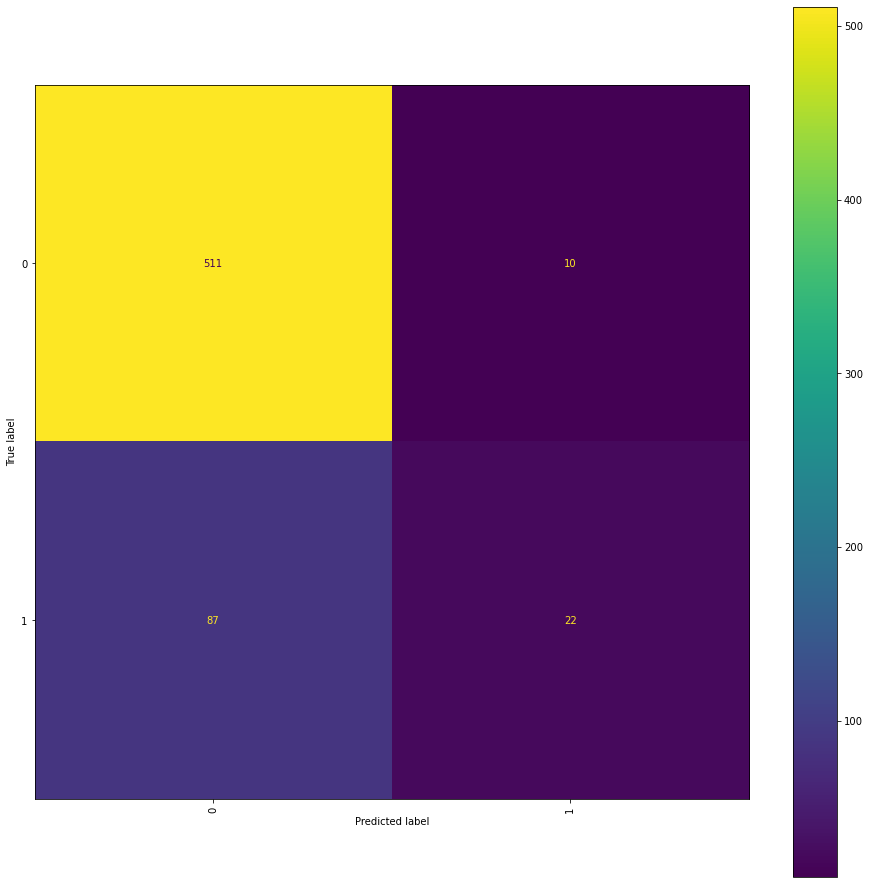

In [140]:
# list of the crop labels
crop_list = data['Churn'].unique()

# Confusion matrix for logistic regression model
cm = confusion_matrix(y_test, predicted_values)
cmp = ConfusionMatrixDisplay(cm, display_labels=crop_list)
fig, ax = plt.subplots(figsize=(16,16))

cmp.plot(ax=ax)

plt.xticks(rotation = 90)
print(" ")

In [132]:
# Cross validation score (Logistic Regression)
score = cross_val_score(logreg, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.84444444 0.84761905 0.84603175 0.85555556 0.86031746]


In [133]:
score.mean()

0.8507936507936508

In [139]:
#Print Train Accuracy
lr_train_accuracy = metrics.accuracy_score(y_train, logreg.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, logreg.predict(X_train)))
#Print Test Accuracy
lr_test_accuracy = metrics.accuracy_score(y_test, logreg.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, logreg.predict(X_test)))

Training accuracy =  0.8555555555555555
Testing accuracy =  0.846031746031746


## Optimizing Logistic Regression Model

In [146]:
# initialising lists of hyperparameters to test for the optimal settings
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [149]:
# Using GridSearchCV to test for hyperparameter setting
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_i

/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_i

/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hduser/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

In [150]:
# Printing out the optimal hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.893968 using {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [248]:
# Initialise logreg model with optimised hyperparameters & fitting the data
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)

# Generating prediction
predicted_values = logreg.predict(X_test)

# Storing the accuracy score to be used later in model comparison
x = metrics.accuracy_score(y_test, predicted_values)*100
acc.append(x)
model.append('Logistic Regression')

x

88.09523809523809

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       521
         1.0       0.81      0.40      0.54       109

    accuracy                           0.88       630
   macro avg       0.85      0.69      0.74       630
weighted avg       0.87      0.88      0.86       630

AxesSubplot(0.125,0.125;0.775x0.755)


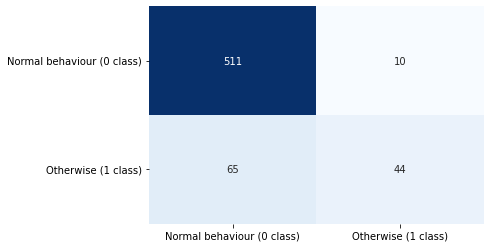

In [152]:
print(classification_report(y_test, predicted_values))
print(sns.heatmap(confusion_matrix(y_test, predicted_values), annot=True, fmt='.4g',                 
                 xticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                
                 yticklabels=['Normal behaviour (0 class)','Otherwise (1 class)'],                  
                 cbar=False, cmap='Blues'))

In [153]:
#Print Train Accuracy
lr_train_accuracy = metrics.accuracy_score(y_train, logreg.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, logreg.predict(X_train)))
#Print Test Accuracy
lr_test_accuracy = metrics.accuracy_score(y_test, logreg.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, logreg.predict(X_test)))

Training accuracy =  0.8964285714285715
Testing accuracy =  0.8809523809523809


In [154]:
# Performing Cross validation
# Cross validation score (Logistic Regression)
score = cross_val_score(logreg, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.9047619  0.87777778 0.89365079 0.89365079 0.9       ]


In [155]:
# Mean accuracy score
score.mean()

0.893968253968254

## Support Vector Machine (SVM)

In [233]:
SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)*100
acc.append(x)
model.append('SVM')

In [142]:
print(" ")
print("SVM's Accuracy is: ", x)
print(" ")
print(classification_report(y_test,predicted_values))

 
SVM's Accuracy is:  0.8539682539682539
 
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92       521
         1.0       0.84      0.19      0.31       109

    accuracy                           0.85       630
   macro avg       0.85      0.59      0.62       630
weighted avg       0.85      0.85      0.81       630



In [143]:
# Cross validation score (SVM)
score = cross_val_score(SVM, X, y,cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.86507937 0.88253968 0.85079365 0.87619048 0.87460317]


In [144]:
score.mean()

0.86984126984127

In [145]:
#Print Train Accuracy
SVM_train_accuracy = metrics.accuracy_score(y_train, SVM.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, SVM.predict(X_train)))
#Print Test Accuracy
SVM_test_accuracy = metrics.accuracy_score(y_test, SVM.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, SVM.predict(X_test)))

Training accuracy =  0.9857142857142858
Testing accuracy =  0.8539682539682539


## Random Forest Classifier (RF)

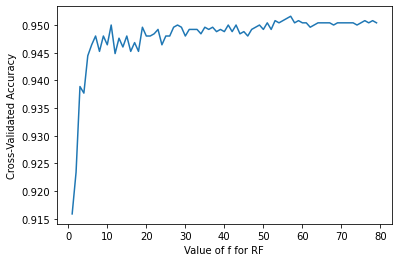

57


In [164]:
# Using a similar approach to logistic regrestion, I will run multiple tests to find the optimal n_estimator value
# Random_state= 0 is used to maintain continuity of results across multiple runs
rf_range = range(1, 80)
rf_scores = []
rf_max = 0
rf_max_score = 0

for f in rf_range:
    RF = RandomForestClassifier(n_estimators=f, random_state=0)
    scores = cross_val_score(RF, X_train, y_train, scoring='accuracy')
    rf_scores.append(scores.mean())
    if scores.mean() > rf_max_score:
        rf_max = f
        rf_max_score = scores.mean()

plt.plot(rf_range, rf_scores)
plt.xlabel('Value of f for RF')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print(rf_max)

In [234]:
RF = RandomForestClassifier(n_estimators=57, random_state=0)
RF.fit(X_train, y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)*100
acc.append(x)
model.append('Random Forest')

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       521
         1.0       0.89      0.78      0.83       109

    accuracy                           0.95       630
   macro avg       0.92      0.88      0.90       630
weighted avg       0.94      0.95      0.94       630



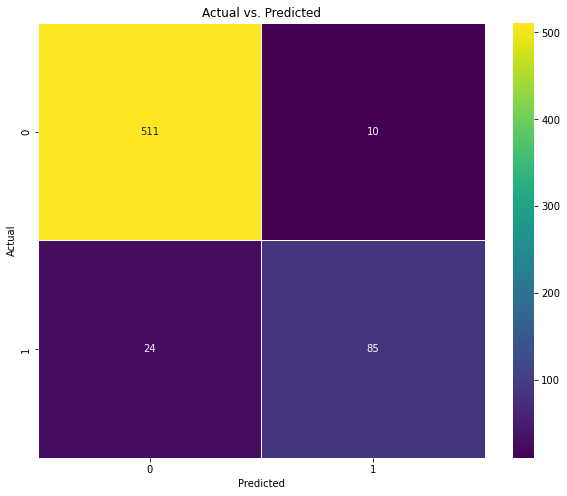

In [166]:
# Classification report and breakdown
print(classification_report( y_test,predicted_values))

y_pred = RF.predict(X_test)
y_true = y_test

cm_RF = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_RF, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

In [167]:
# Storing the accuracy values for model results comparison later

#Print Train Accuracy
rf_train_accuracy = metrics.accuracy_score(y_train, RF.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, RF.predict(X_train)))

#Print Test Accuracy
rf_test_accuracy = metrics.accuracy_score(y_test, RF.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, RF.predict(X_test)))

Training accuracy =  0.9920634920634921
Testing accuracy =  0.946031746031746


In [168]:
# Cross validation on dataset
score = cross_val_score(RF, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.95079365 0.96031746 0.94444444 0.95873016 0.95396825]


In [169]:
# Mean score
score.mean()

0.9536507936507936

## AdaBoost Classifier

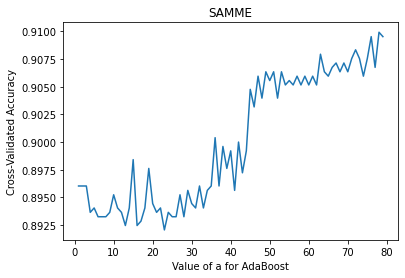

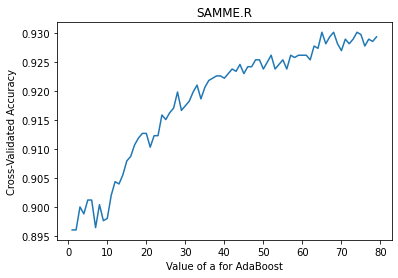

65 SAMME.R


In [197]:
ada_range = range(1, 80)
ada_scores_SAMME = []
ada_scores_SAMME_R = []
ada_max = 0
ada_max_score = 0
algorithm_max = 0

algorithm = ['SAMME', 'SAMME.R']

for a in ada_range:
    for algo in range(len(algorithm)):
        ada = AdaBoostClassifier(n_estimators=a, algorithm= algorithm[algo], random_state=0)
        scores = cross_val_score(ada, X_train, y_train, scoring='accuracy')
        if algo == 0:
            ada_scores_SAMME.append(scores.mean())
        else:
            ada_scores_SAMME_R.append(scores.mean())
        if scores.mean() > ada_max_score:
            ada_max = a
            ada_max_score = scores.mean()
            algorithm_max = algorithm[algo]

plt.plot(ada_range, ada_scores_SAMME)
plt.xlabel('Value of a for AdaBoost')
plt.ylabel('Cross-Validated Accuracy')
plt.title('SAMME')
plt.show()

plt.plot(ada_range, ada_scores_SAMME_R)
plt.xlabel('Value of a for AdaBoost')
plt.ylabel('Cross-Validated Accuracy')
plt.title('SAMME.R')
plt.show()

print(ada_max, algorithm_max)

## Runnig Optimized AdaBoost

In [200]:
ada = AdaBoostClassifier(n_estimators=65, algorithm="SAMME.R", random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=65, random_state=0)

In [201]:
predicted_values = ada.predict(X_test)

In [236]:
x = metrics.accuracy_score(y_test, predicted_values) * 100
acc.append(x)
model.append('AdaBoost')
x

94.6031746031746

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       521
         1.0       0.85      0.75      0.80       109

    accuracy                           0.93       630
   macro avg       0.90      0.86      0.88       630
weighted avg       0.93      0.93      0.93       630



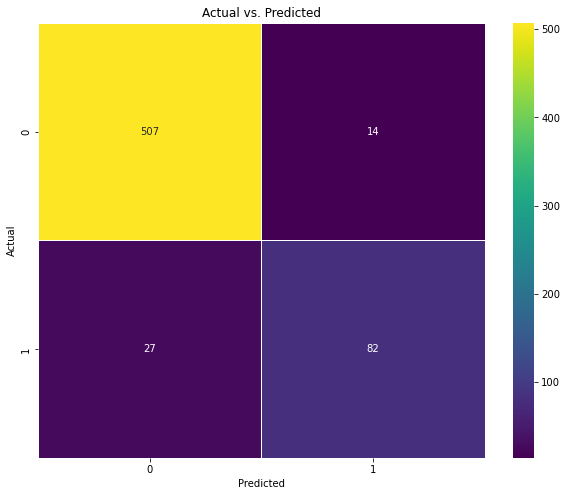

In [203]:
# Classification report and breakdown
print(classification_report(y_test,predicted_values))

y_pred = ada.predict(X_test)
y_true = y_test

cm_Ada = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_Ada, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

In [204]:
# Storing the accuracy values for model results comparison later

#Print Train Accuracy
ada_train_accuracy = metrics.accuracy_score(y_train, ada.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, ada.predict(X_train)))

#Print Test Accuracy
ada_test_accuracy = metrics.accuracy_score(y_test, ada.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, ada.predict(X_test)))

Training accuracy =  0.944047619047619
Testing accuracy =  0.9349206349206349


In [206]:
# Cross validation on dataset
score = cross_val_score(ada, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93015873 0.93174603 0.91587302 0.92698413 0.92539683]


In [207]:
# Mean score
score.mean()

0.9260317460317461

## XGBoost Classifier

In [216]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [218]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Model with rank: 1
Mean validation score: 0.957 (std: 0.007)
Parameters: {'colsample_bytree': 0.8167605036202489, 'gamma': 0.00541882574014918, 'learning_rate': 0.3016145929257791, 'max_depth': 5, 'n_estimators': 108, 'subsample': 0.7277254550361659}



In [217]:
report_best_scores(search.cv_results_, 1)

Model with rank: 1
Mean validation score: 0.957 (std: 0.007)
Parameters: {'colsample_bytree': 0.8167605036202489, 'gamma': 0.00541882574014918, 'learning_rate': 0.3016145929257791, 'max_depth': 5, 'n_estimators': 108, 'subsample': 0.7277254550361659}



In [225]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0, colsample_bytree=0.81676, gamma = 0.005419, learning_rate = 0.3016145, max_depth = 5, n_estimators = 108, subsample = 0.7277)
xgb_model.fit(X_train, y_train)

predicted_values = xgb_model.predict(X_test)


In [247]:
x = metrics.accuracy_score(y_test, predicted_values) * 100
acc.append(x)
model.append('XGBoost')
x

94.6031746031746

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       521
         1.0       0.91      0.81      0.85       109

    accuracy                           0.95       630
   macro avg       0.93      0.90      0.91       630
weighted avg       0.95      0.95      0.95       630



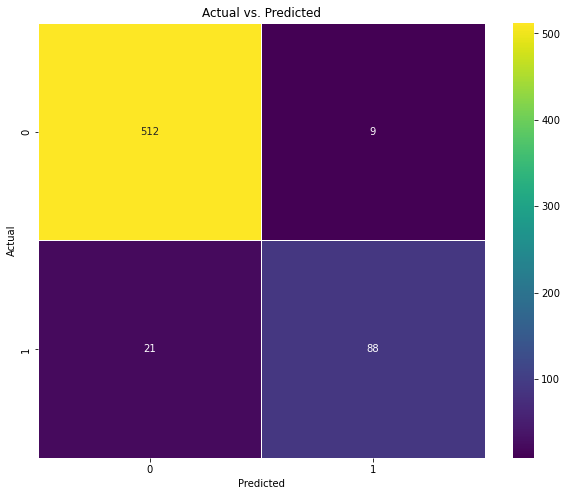

In [227]:
# Classification report and breakdown
print(classification_report(y_test,predicted_values))

y_pred = xgb_model.predict(X_test)
y_true = y_test

cm_XGB = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm_XGB, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

In [229]:
# Storing the accuracy values for model results comparison later

#Print Train Accuracy
xgb_train_accuracy = metrics.accuracy_score(y_train, xgb_model.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, xgb_model.predict(X_train)))

#Print Test Accuracy
xgb_test_accuracy = metrics.accuracy_score(y_test, xgb_model.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, xgb_model.predict(X_test)))

Training accuracy =  0.9912698412698413
Testing accuracy =  0.9523809523809523


In [230]:
# Cross validation on dataset
score = cross_val_score(ada, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [0.93015873 0.93174603 0.91587302 0.92698413 0.92539683]


In [231]:
# Mean score
score.mean()

0.9260317460317461

## Model Comparison

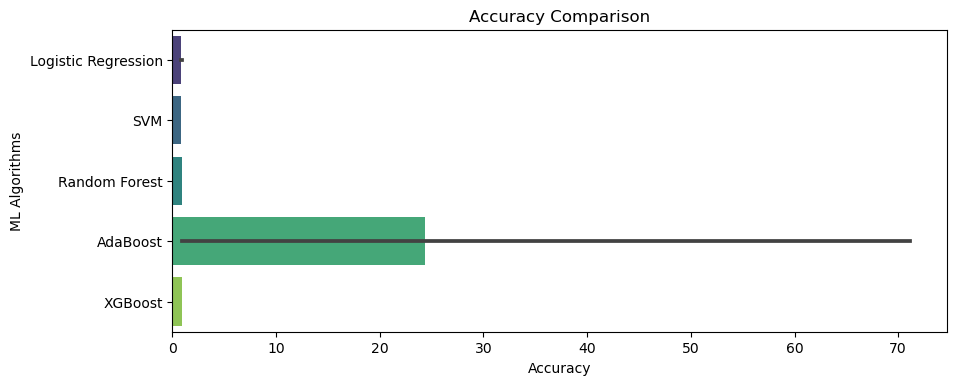

In [246]:
plt.figure(figsize=[10,4],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
print(" ")

In [253]:
acc

[0.846031746031746,
 0.8539682539682539,
 0.8809523809523809,
 0.946031746031746,
 0.9349206349206349,
 0.9349206349206349,
 0.9349206349206349,
 0.9523809523809523,
 0.8539682539682539,
 0.946031746031746,
 0.946031746031746,
 94.6031746031746,
 0.946031746031746,
 94.6031746031746,
 88.09523809523809,
 95.23809523809523]

In [254]:
model

['Logistic Regression',
 'SVM',
 'Logistic Regression',
 'Random Forest',
 'AdaBoost',
 'AdaBoost',
 'XGBoost',
 'XGBoost',
 'SVM',
 'Random Forest',
 'AdaBoost',
 'AdaBoost',
 'XGBoost',
 'XGBoost',
 'Logistic Regression',
 'Single_Layer Perceptron']